In [1]:
from shapely.geometry import Polygon
import numpy as np

In [2]:
import geopandas as gpd
from tobler import area_interpolate, area_tables

## Example: Two GeoDataFrames

In [3]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (10,0), (10,5), (0,5)]),
                      Polygon([(0,5), (0,10),  (10,10), (10,5)])])

polys2 = gpd.GeoSeries([Polygon([(0,0), (5,0), (5,7), (0,7)]),
                      Polygon([(5,0), (5,10),  (10,10), (10,0)]),
                       Polygon([(0,7), (0,10), (5,10), (5,7)  ])
                       ])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df1['population'] = [ 500,  200]
df1['pci'] = [75, 100]
df1['income'] = df1['population'] * df1['pci']

df2['population'] = [ 500,  100, 200]
df2['pci'] = [75, 80, 100]
df2['income'] = df2['population'] * df2['pci']

ax = df1.plot(color='red', edgecolor='k')

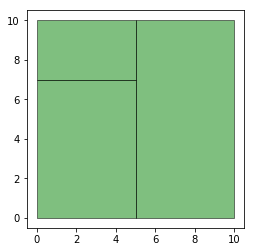

In [4]:
ax = df2.plot(color='green', alpha=0.5, edgecolor='k')

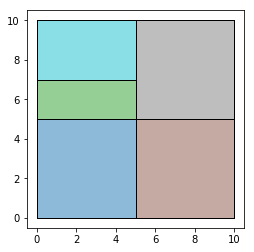

In [5]:
res_union = gpd.overlay(df1, df2, how='union')
ax = res_union.plot(alpha=0.5, cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

## Area Table

In [6]:
area_tables(df1, df2)

(array([[25.,  0., 25.,  0.,  0.],
        [ 0., 10.,  0., 25., 15.]]), array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [7]:
area_tables(df2, df1)

(array([[25.,  0., 10.,  0.,  0.],
        [ 0., 25.,  0., 25.,  0.],
        [ 0.,  0.,  0.,  0., 15.]]), array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [8]:
extensive_vars = ['population', 'income']
intensive_vars = ['pci']
estimates = area_interpolate(df1, df2, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars)

estimates

(array([[  290.,   350.,    60.],
        [22750., 28750.,  6000.]]),
 array([[ 82.14285714,  87.5       , 100.        ]]))

In [9]:
extensive_vars = ['population', 'income']
intensive_vars = ['pci']
estimates = area_interpolate(df2, df1, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars)
estimates

(array([[  407.14285714,   392.85714286],
        [30785.71428571, 34714.28571429]]), array([[77.5, 85. ]]))

## Non-exhuastive case

Here the first set of polygons have an envelope that does not coincide with that of the second dataframe.


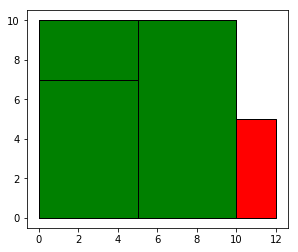

In [10]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (12,0), (12,5), (0,5)]),
                      Polygon([(0,5), (0,10),  (10,10), (10,5)])])

polys2 = gpd.GeoSeries([Polygon([(0,0), (5,0), (5,7), (0,7)]),
                      Polygon([(5,0), (5,10),  (10,10), (10,0)]),
                       Polygon([(0,7), (0,10), (5,10), (5,7)  ])
                       ])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df1['population'] = [ 500,  200]
df1['pci'] = [75, 100]
df1['income'] = df1['population'] * df1['pci']

df2['population'] = [ 500,  100, 200]
df2['pci'] = [75, 80, 100]
df2['income'] = df2['population'] * df2['pci']

ax = df1.plot(color='red', edgecolor='k')
df2.plot(ax=ax, color='green',edgecolor='k')


In [11]:
extensive_vars = ['population']
intensive_vars = ['pci']
estimates = area_interpolate(df1, df2, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars)
estimates

(array([[290., 350.,  60.]]),
 array([[ 82.14285714,  87.5       , 100.        ]]))

In [12]:
estimates[0].sum()

700.0

In [13]:
extensive_vars = ['population']
intensive_vars = ['pci']
estimates = area_interpolate(df1, df2, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars,
                            allocate_total=False)
estimates

(array([[248.33333333, 308.33333333,  60.        ]]),
 array([[ 82.14285714,  87.5       , 100.        ]]))

In [14]:
estimates[0].sum()

616.6666666666667

When setting `allocate_total=False` the total population of a source zone is not completely allocated, but rather the proportion of total population is set to the area of intersection over the area of the source zone.

This will have no effect when the source df is df2 and the target df is df 1:

In [15]:
extensive_vars = ['population']
estimates = area_interpolate(df2, df1, extensive_variables = extensive_vars)
estimates

(array([[407.14285714, 392.85714286]]), array([], dtype=float64))

In [16]:
extensive_vars = ['population']
estimates = area_interpolate(df2, df1, extensive_variables = extensive_vars, allocate_total=False)
estimates

(array([[407.14285714, 392.85714286]]), array([], dtype=float64))